<a href="https://colab.research.google.com/github/NavdeepTU/Deep-Learning/blob/main/03.%20Load%20and%20preprocess%20data/03.%20Load%20CSV%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# setup
import pandas as pd
import numpy as np

# make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

In [48]:
# for any small csv dataset the simplest way to train a tensorflow model
# on it is to load it into memory as a pandas Dataframe or a numpy array

abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
             "Viscera weight", "Shell weight", "Age"]
)

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [49]:
# seperate the features and labels for training

abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [50]:
# pack the features into a single numpy array
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [51]:
# make a regression model to predict the age
abalone_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

abalone_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                      optimizer=tf.keras.optimizers.Adam())

In [52]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 56.7400
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 11.1599
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 8.8682
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 8.2908
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 7.7850
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 7.3698
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 7.0746
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 6.8677
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 6.7224
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 6.6057


In [53]:
# we have just seen the most basic way to train a model using CSV data.
# next, we will learn how to apply preprocessing to normalize numeric columns.

In [54]:
# basic preprocessing
normalize = tf.keras.layers.Normalization()

In [55]:
normalize.adapt(abalone_features)

In [56]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 92.5914
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 54.7760
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 18.3381
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 6.3351
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 5.1556
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9886
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9492
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9147
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9070
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9156


In [57]:
# mixed data types

titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [58]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [59]:
# now lets convert the categorical features to numeric variables

In [60]:
# In this example, you'll build a model that implements the preprocessing logic using Keras functional API.
# You could also do it by subclassing.

# The functional API operates on "symbolic" tensors. Normal "eager" tensors have a value.
# In contrast these "symbolic" tensors do not. Instead they keep track of which operations are run on them,
# and build a representation of the calculation, that you can run later. Here's a quick example:

In [61]:
# create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add_1')>

In [62]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [63]:
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


In [64]:
# To build the preprocessing model, start by building a set of symbolic
# tf.keras.Input objects, matching the names and data-types of the CSV columns.

inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [65]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = tf.keras.layers.Concatenate()(list(numeric_inputs.values()))
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_3')>

In [66]:
preprocessed_inputs = [all_numeric_inputs]

In [67]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = tf.keras.layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

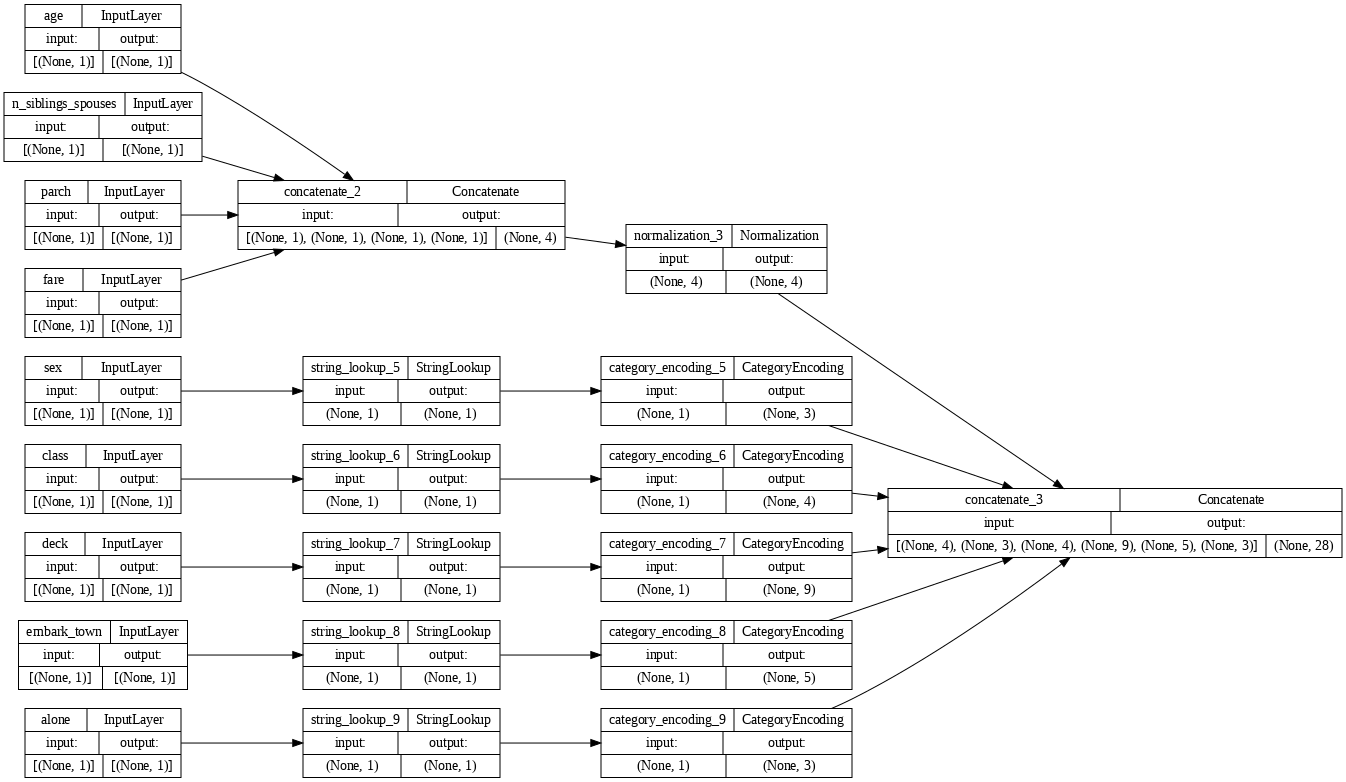

In [68]:
preprocessed_inputs_cat = tf.keras.layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing, rankdir="LR", dpi=72, show_shapes=True)

In [69]:
titanic_features_dict = {name: np.array(value)
                         for name,value in titanic_features.items()}

In [70]:
# Slice out the first training example and pass it to this preprocessing model,
# you see the numeric features and string one-hots all concatenated together

features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [71]:
# now build the model on top of this

def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
      tf.keras.layers.Dense(64),
      tf.keras.layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())

  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [72]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 3ms/step - loss: 0.6034
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5158
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4773
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4560
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4416
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4336
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4288
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4257
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4242
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4226


In [73]:
# Since the preprocessing is part of the model, you can save the model
# and reload it somewhere else and get identical results
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

In [74]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.884]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.884]], shape=(1, 1), dtype=float32)


In [75]:
# Using tf.data

# In the previous section you relied on the model's built-in data shuffling and batching while training the model.

# If you need more control over the input data pipeline or need to use data that doesn't easily fit into memory: use tf.data.

import itertools

def slices(features):
  for i in itertools.count():
    # for each feature take index i
    example = {name:values[i] for name,values in features.items()}
    yield example

In [76]:
# print the first example
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [77]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

In [78]:
# you can iterate over a tf.data.Dataset like any other python iterable
for example in features_ds:
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [79]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [80]:
# to train a model using this Dataset , you'll need to atleast shuffle and batch the data
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

In [81]:
# instead of passing features and labels to Model.fit you pass the dataset.
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 [==============================] - 1s 3ms/step - loss: 0.4207
Epoch 2/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4209
Epoch 3/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4208
Epoch 4/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4202
Epoch 5/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4192


In [82]:
# from a single file

titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [83]:
# now read the csv data from the file and create a tf.data.Dataset

titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show
    label_name='survived',
    num_epochs=1,
    ignore_errors=True
)

# Make sure to set the num_epochs argument in tf.data.experimental.make_csv_dataset,
# otherwise the default behavior for tf.data.Dataset is to loop endlessly.

In [84]:
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

sex                 : [b'female' b'female' b'male' b'male' b'male']
age                 : [ 2. 18. 25. 28. 26.]
n_siblings_spouses  : [1 2 0 0 2]
parch               : [1 2 0 0 0]
fare                : [ 26.    262.375   7.05    7.896   8.663]
class               : [b'Second' b'First' b'Third' b'Third' b'Third']
deck                : [b'unknown' b'B' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Cherbourg' b'Southampton' b'Southampton' b'Southampton']
alone               : [b'n' b'n' b'y' b'y' b'n']

label               : [1 1 0 0 0]


In [85]:
# It can also decompress the data on the fly.
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz',
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic'
)

In [86]:
# Set the compression_type argument to read directly from the compressed file

traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP"
)

for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value[:5]}")
  print()
  print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [286.55 294.85 263.47 291.58 265.26]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [90  1  1  0 40]
weather_main        : [b'Rain' b'Clear' b'Clear' b'Clear' b'Clouds']
weather_description : [b'moderate rain' b'sky is clear' b'sky is clear' b'Sky is Clear'
 b'scattered clouds']
date_time           : [b'2013-09-28 11:00:00' b'2013-05-19 23:00:00' b'2012-11-27 21:00:00'
 b'2013-08-19 00:00:00' b'2012-12-06 04:00:00']

label               : [5208 1094 2194  660  780]


In [87]:
# Caching

# iterating over the traffic_volume_csv_gz_ds 20 times may take around
# 15 seconds without caching, or about two seconds with caching.

%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 24.4 s, sys: 3.62 s, total: 28 s
Wall time: 41 s


In [88]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 23.7 s, sys: 3.45 s, total: 27.2 s
Wall time: 41 s


In [89]:
%%time
snapshotting = traffic_volume_csv_gz_ds.snapshot('titanic.tfsnap').shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 2.79 s, sys: 154 ms, total: 2.94 s
Wall time: 2.37 s


In [90]:
# Multiple files

fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

In [91]:
import pathlib
font_csvs = sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

font_csvs[:10]

['fonts/AGENCY.csv',
 'fonts/ARIAL.csv',
 'fonts/BAITI.csv',
 'fonts/BANKGOTHIC.csv',
 'fonts/BASKERVILLE.csv',
 'fonts/BAUHAUS.csv',
 'fonts/BELL.csv',
 'fonts/BERLIN.csv',
 'fonts/BERNARD.csv',
 'fonts/BITSTREAMVERA.csv']

In [92]:
len(font_csvs)

153